In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.patches as mpatches

# import matplotlib.pyplot as plt
# import seaborn as sns

# Load the dataset 
df = pd.read_csv("immo_data.csv",encoding='latin1')
df.head()

,regio1,serviceCharge,heatingType,telekomTvOffer,telekomHybridUploadSpeed,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,...,regio2,regio3,description,facilities,heatingCosts,energyEfficiencyClass,lastRefurbish,electricityBasePrice,electricityKwhPrice,date
0,Nordrhein_Westfalen,245.00,central_heating,ONE_YEAR_FREE,NaN,False,False,6,4.62,10.0,...,Dortmund,SchÃ¼ren,Die ebenerdig zu erreichende Erdgeschosswohnun...,Die Wohnung ist mit Laminat ausgelegt. Das Bad...,NaN,NaN,NaN,NaN,NaN,43586
1,Rheinland_Pfalz,134.00,self_contained_central_heating,ONE_YEAR_FREE,NaN,False,True,8,3.47,10.0,...,Rhein_Pfalz_Kreis,BÃ¶hl_Iggelheim,Alles neu macht der Mai â so kann es auch fÃ...,NaN,NaN,NaN,2019.0,NaN,NaN,43586
2,Sachsen,255.00,floor_heating,ONE_YEAR_FREE,10.0,True,True,8,2.72,2.4,...,Dresden,ÃuÃere_Neustadt_Antonstadt,Der Neubau entsteht im Herzen der Dresdner Neu...,* 9 mÂ² Balkon\n* Bad mit bodengleicher Dusche...,NaN,NaN,NaN,NaN,NaN,43739
3,Sachsen,58.15,district_heating,ONE_YEAR_FREE,NaN,False,True,9,1.53,40.0,...,Mittelsachsen_Kreis,Freiberg,Abseits von LÃ¤rm und Abgasen in Ihre neue Woh...,NaN,87.23,NaN,NaN,NaN,NaN,43586
4,Bremen,138.00,self_contained_central_heating,NaN,NaN,False,True,19,2.46,NaN,...,Bremen,Neu_Schwachhausen,Es handelt sich hier um ein saniertes Mehrfami...,Diese Wohnung wurde neu saniert und ist wie fo...,NaN,NaN,NaN,NaN,NaN,43862


In [2]:
len(df.columns) ,df.shape

(49, (268850, 49))

In [3]:
df.describe()

,serviceCharge,telekomHybridUploadSpeed,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,scoutId,noParkSpaces,yearConstructedRange,...,thermalChar,floor,numberOfFloors,noRoomsRange,livingSpaceRange,heatingCosts,lastRefurbish,electricityBasePrice,electricityKwhPrice,date
count,261941.000000,45020.0,268850.000000,267018.000000,235492.000000,2.283330e+05,211805.000000,2.688500e+05,93052.000000,211805.000000,...,162344.000000,217541.000000,171118.000000,268850.000000,268850.000000,85518.000000,80711.000000,46846.000000,46846.000000,268850.000000
mean,151.206113,10.0,9.791958,3.389001,28.804928,9.013315e+02,1966.400590,1.069697e+08,1.327634,3.714544,...,114.749533,2.122405,3.572319,2.571542,3.070790,76.990866,2013.904536,89.113612,0.199769,43663.170232
std,308.295790,0.0,6.408399,1.964874,16.337151,3.323833e+04,46.992207,1.250093e+07,8.361403,2.738134,...,61.653663,3.634934,6.375496,0.937594,1.407127,147.716278,10.963125,5.395805,0.009667,180.324523
min,0.000000,10.0,0.000000,-12.330000,1.000000,0.000000e+00,1000.000000,2.887174e+07,0.000000,1.000000,...,0.100000,-1.000000,0.000000,1.000000,1.000000,0.000000,1015.000000,71.430000,0.170500,43344.000000
25%,95.000000,10.0,6.000000,2.000000,10.000000,4.698000e+02,1950.000000,1.066910e+08,1.000000,1.000000,...,79.000000,1.000000,2.000000,2.000000,2.000000,54.000000,2012.000000,90.760000,0.191500,43586.000000
50%,135.000000,10.0,9.000000,3.390000,40.000000,6.500000e+02,1973.000000,1.111584e+08,1.000000,3.000000,...,107.000000,2.000000,3.000000,3.000000,3.000000,70.000000,2017.000000,90.760000,0.198500,43739.000000
75%,190.000000,10.0,13.000000,4.570000,40.000000,9.850000e+02,1996.000000,1.137688e+08,1.000000,5.000000,...,140.300000,3.000000,4.000000,3.000000,4.000000,90.000000,2019.000000,90.760000,0.205500,43862.000000
max,146118.000000,10.0,121.000000,14.920000,100.000000,1.575154e+07,2090.000000,1.157117e+08,2241.000000,9.000000,...,1996.000000,999.000000,999.000000,5.000000,7.000000,12613.000000,2919.000000,90.760000,0.227600,43862.000000


In [4]:
# Calculate the total missing values for each column
missing_values = df.isnull().sum()

# Display the missing values for each column
print("Missing values per column:")
print(missing_values)


Missing values per column:
regio1                           0
serviceCharge                 6909
heatingType                  44856
telekomTvOffer               32619
telekomHybridUploadSpeed    223830
newlyConst                       0
balcony                          0
picturecount                     0
pricetrend                    1832
telekomUploadSpeed           33358
totalRent                    40517
yearConstructed              57045
scoutId                          0
noParkSpaces                175798
firingTypes                  56964
hasKitchen                       0
geo_bln                          0
cellar                           0
yearConstructedRange         57045
baseRent                         0
houseNumber                  71018
livingSpace                      0
geo_krs                          0
condition                    68489
interiorQual                112665
petsAllowed                 114573
street                           0
streetPlain                 

In [5]:
# Calculate the percentage of missing values for each column
missing_percentage = (df.isnull().sum() / len(df)) * 100

# Combine total and percentage missing values into a DataFrame for better visualization
missing_summary = pd.DataFrame({
    'Total Missing': missing_values,
    'Percentage Missing': missing_percentage
})

# Display the missing value summary
print("Missing values summary:")
print(missing_summary)

Missing values summary:
                          Total Missing  Percentage Missing
regio1                                0            0.000000
serviceCharge                      6909            2.569834
heatingType                       44856           16.684397
telekomTvOffer                    32619           12.132788
telekomHybridUploadSpeed         223830           83.254603
newlyConst                            0            0.000000
balcony                               0            0.000000
picturecount                          0            0.000000
pricetrend                         1832            0.681421
telekomUploadSpeed                33358           12.407662
totalRent                         40517           15.070485
yearConstructed                   57045           21.218151
scoutId                               0            0.000000
noParkSpaces                     175798           65.388879
firingTypes                       56964           21.188023
hasKitchen      

In [6]:
# remove columns with more than 40% missing values
columns_with_missing = missing_percentage[missing_percentage > 40].index.tolist()

print("Columns with more than 40% missing values:")
print(len(columns_with_missing))
columns_with_missing

Columns with more than 40% missing values:
9


['telekomHybridUploadSpeed',
 'noParkSpaces',
 'interiorQual',
 'petsAllowed',
 'heatingCosts',
 'energyEfficiencyClass',
 'lastRefurbish',
 'electricityBasePrice',
 'electricityKwhPrice']

In [7]:
#drop unneccesary columns becaus it has lots of false valued

df=df.drop(columns=columns_with_missing)

unnecry_cols=["description","facilities","date","scoutId"]
df=df.drop(columns=unnecry_cols,axis=1)
len(df.columns)

36

In [8]:
# Remove duplicates
df = df.drop_duplicates()

#it is false data according to my reserch
# Remove rows where 'livingSpace' is 0
df = df[df["livingSpace"] != 0]

# Remove rows where 'baseRent' and 'totalRent' are both less than 10
df = df[~((df["baseRent"] < 10) & (df["totalRent"] < 10))]

# Remove rows where 'totalRent' is greater than 'baseRent'
df = df[df["totalRent"] > df["baseRent"]]

# Check the shape of the cleaned dataset
print(df.shape)

(220986, 36)


In [9]:
# Rename specific columns
df = df.rename(columns={
    'regio1': 'state',
    'regio2': 'city',
    'regio3': 'area'
})

# Verify the new column names
df.head()

,state,serviceCharge,heatingType,telekomTvOffer,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,totalRent,...,geo_plz,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,garden,livingSpaceRange,city,area
0,Nordrhein_Westfalen,245.0,central_heating,ONE_YEAR_FREE,False,False,6,4.62,10.0,840.00,...,44269,4.0,181.4,1.0,3.0,4,True,4,Dortmund,SchÃ¼ren
2,Sachsen,255.0,floor_heating,ONE_YEAR_FREE,True,True,8,2.72,2.4,1300.00,...,1097,3.0,NaN,3.0,4.0,3,False,4,Dresden,ÃuÃere_Neustadt_Antonstadt
4,Bremen,138.0,self_contained_central_heating,NaN,False,True,19,2.46,NaN,903.00,...,28213,3.0,188.9,1.0,NaN,3,False,4,Bremen,Neu_Schwachhausen
6,Sachsen,70.0,self_contained_central_heating,ONE_YEAR_FREE,False,False,9,1.01,2.4,380.00,...,9599,2.0,NaN,1.0,4.0,2,True,3,Mittelsachsen_Kreis,Freiberg
7,Bremen,88.0,central_heating,ONE_YEAR_FREE,False,True,5,1.89,2.4,584.25,...,28717,3.0,63.0,NaN,NaN,3,False,2,Bremen,St._Magnus


In [10]:
# Fill missing numerical values with the median
num_cols = df.select_dtypes(include=[np.number]).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# Fill missing categorical values with the mode
cat_cols = df.select_dtypes(include=[object]).columns
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])

In [11]:
# df.to_csv("dags/preproced_data.csv",index=False)

In [12]:
from dags.functions import (
    load_dataset,  # Function to load datasets from CSV or Excel files
    highest_roi,  # Function to calculate areas with the highest return on investment
    common_rental_price_range,  # Function to determine the most common rental price range
    top_rent_increases,  # Function to identify ZIP codes with the highest rent increases
    most_common_heating_type,  # Function to find the most commonly used heating type
    avg_rent_per_sqft_top_cities  # Function to calculate average rent per square foot in top cities
)
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
data =df

2. Most Common Rental Price Range Using Histograms

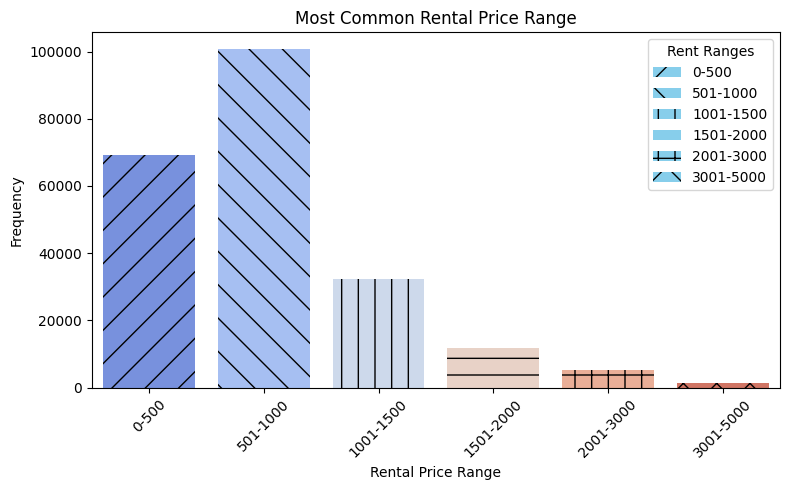

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches

# Define rent ranges
bins = [0, 500, 1000, 1500, 2000, 3000, 5000]
data['rent_range'] = pd.cut(data['totalRent'], bins=bins, labels=['0-500', '501-1000', '1001-1500', '1501-2000', '2001-3000', '3001-5000'])

# Create the bar plot
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='rent_range', data=data, palette='coolwarm')

# Define patterns (hatching styles)
patterns = ['/', '\\', '|', '-', '+', 'x']

# Apply patterns to bars
for bar, pattern in zip(ax.patches, patterns * (len(ax.patches) // len(patterns) + 1)):
    bar.set_hatch(pattern)

# Add legend for patterns
handles = [
    mpatches.Patch(facecolor='skyblue', hatch=pattern, label=label)
    for pattern, label in zip(patterns, ['0-500', '501-1000', '1001-1500', '1501-2000', '2001-3000', '3001-5000'])
]
plt.legend(handles=handles, title="Rent Ranges", loc="upper right")

# Add labels and title
plt.title('Most Common Rental Price Range')
plt.xlabel('Rental Price Range')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


4. Common Heating Types Using Frequency Analysis

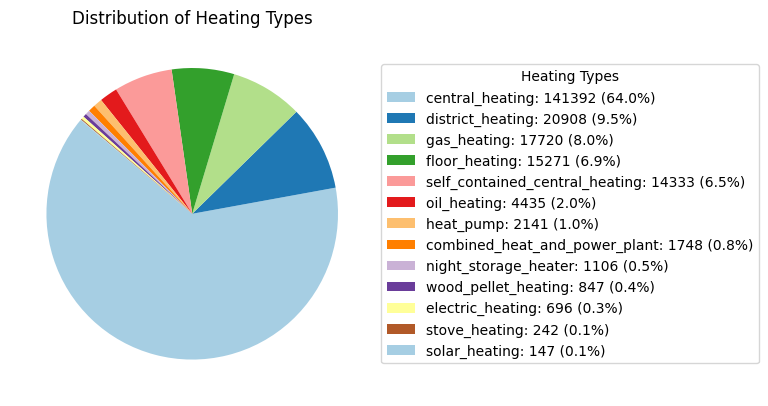

In [17]:
import matplotlib.pyplot as plt

# Calculate the frequency of each heating type
heating_counts = data['heatingType'].value_counts()
colors = plt.cm.Paired.colors  # Generate color map

# Create a pie chart
plt.figure(figsize=(7, 5))
wedges, texts = plt.pie(
    heating_counts,
    labels=None,  # Do not add labels directly on the chart
    startangle=140,
    colors=colors
)

# Add legend with labels and percentages
legend_labels = [
    f"{label}: {count} ({count / heating_counts.sum() * 100:.1f}%)"
    for label, count in zip(heating_counts.index, heating_counts)
]

plt.legend(
    wedges,
    legend_labels,
    title="Heating Types",
    loc="center left",
    bbox_to_anchor=(1, 0.5)
)

plt.title('Distribution of Heating Types')
plt.tight_layout()  # Adjust layout for the legend
plt.savefig("HeatingType.pdf", format="pdf", bbox_inches="tight")
plt.show()


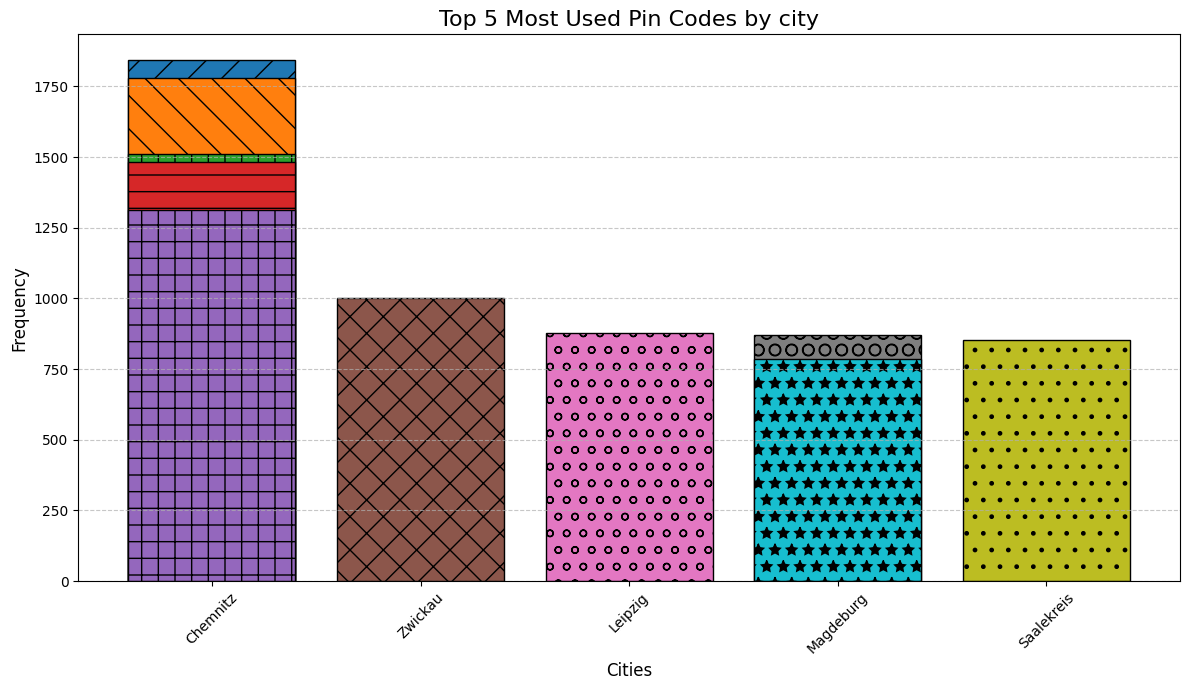

In [30]:

# Specify the column names for pin codes and cities
pin_code_column = 'geo_plz'  # Replace with your actual pin code column name
city_column = 'city'  # Replace with your actual city column name

# Number of top pin codes to display
top_n = 10

# Check if the required columns exist in the dataset
if pin_code_column not in data.columns or city_column not in data.columns:
    raise KeyError(f"One or more required columns ('{pin_code_column}', '{city_column}') are missing in the dataset.")

# Count occurrences of each pin code
pin_code_counts = data[pin_code_column].value_counts()

# Get the top N most frequent pin codes
top_pincodes = pin_code_counts.head(top_n)

# Map pin codes to their corresponding city (taking the first city for each pin code)
# Drop duplicates to ensure each pin code corresponds to one city
pin_code_to_city = data.drop_duplicates(subset=[pin_code_column])[['geo_plz', 'city']].set_index(pin_code_column)

# Ensure that the cities for the top pin codes are retrieved correctly
top_cities = top_pincodes.index.map(lambda x: pin_code_to_city.loc[x, 'city'] if x in pin_code_to_city.index else 'Unknown')

# Generate bar colors and patterns
colors = plt.cm.tab10(np.linspace(0, 1, top_n))  # Generate distinct colors
patterns = ['/', '\\', '|', '-', '+', 'x', 'o', 'O', '.', '*']  # Patterns for bars

# Plot the results
plt.figure(figsize=(12, 7))
bars = plt.bar(top_cities, top_pincodes.values, color=colors, edgecolor='black')

# Add patterns to the bars
for bar, pattern in zip(bars, patterns):
    bar.set_hatch(pattern)

# Add labels and title
plt.title(f"Top {5} Most Used Pin Codes by city", fontsize=16)
plt.xlabel("Cities", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig("mostUsedPincodesCity.pdf", format="pdf", bbox_inches="tight")

# Display the plot
plt.tight_layout()
plt.show()
